1)  Show that the Wiener-Khichine theorem holds for the 2D variance
spectrum for Landsat A17.  That is
    show that integrating the power spectrum over :math:`k_x` and
:math:`k_y` yields the variance of theoptical depth.

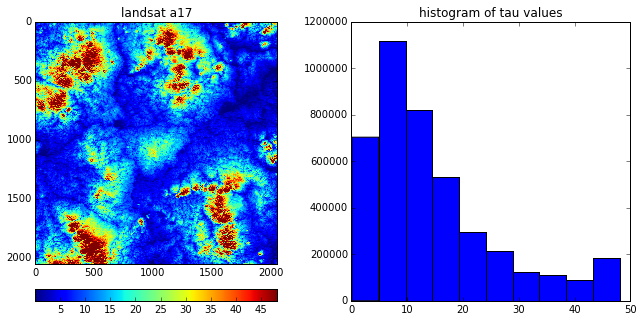

In [5]:
import numpy as np
import warnings
warnings.filterwarnings("ignore",category=FutureWarning)
from matplotlib import pyplot as plt
import urllib
import os
filelist=['a17.nc']
data_download=True
if data_download:
    for the_file in filelist:
        url='http://clouds.eos.ubc.ca/~phil/docs/atsc500/data/{}'.format(the_file)
        urllib.request.urlretrieve(url,the_file)
#print("download {}: size is {:6.2g} Mbytes".format(the_file,os.path.getsize(the_file)*1.e-6))
from netCDF4 import Dataset
with Dataset(filelist[0]) as nc:
    tau=nc.variables['tau'][...]
    
from matplotlib import pyplot as plt
%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable
plt.close('all')
fig,ax=plt.subplots(1,2,figsize=(11,5))
ax[0].set_title('landsat a17')
im0=ax[0].imshow(tau)
im1=ax[1].hist(tau.ravel())
ax[1].set_title('histogram of tau values')
divider = make_axes_locatable(ax[0])
cax = divider.append_axes("bottom", size="5%", pad=0.35)
out=fig.colorbar(im0,orientation='horizontal',cax=cax)


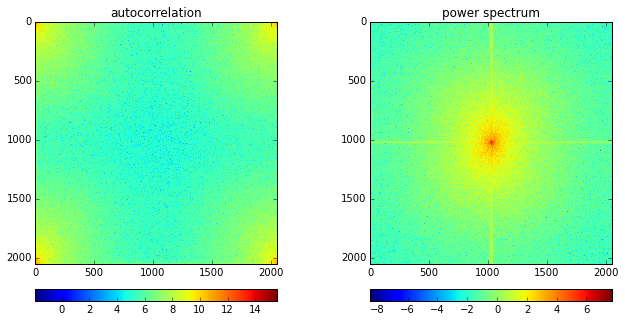

In [17]:
#plotting FFT and 

from ubc_fft_class import ubc_fft
from numpy import fft


##calculate the autocorrelation
the_fft = fft.fft2(tau)
auto_fft = the_fft*np.conj(the_fft)
auto_fft=np.real(auto_fft)

##use the ubc_fft class to be able to plot the power spectrum
output = ubc_fft('a17.nc','tau',0.025)
output.power_spectrum()


plt.close('all')
fig,ax=plt.subplots(1,2,figsize=(11,5))
ax[0].set_title('autocorrelation')
im0=ax[0].imshow(np.log10(auto_fft))
im1=ax[1].imshow(np.log10(output.spectral_dens))
ax[1].set_title('power spectrum')
divider = make_axes_locatable(ax[0])
cax = divider.append_axes("bottom", size="5%", pad=0.35)
out=fig.colorbar(im0,orientation='horizontal',cax=cax)
divider = make_axes_locatable(ax[1])
cax = divider.append_axes("bottom", size="5%", pad=0.35)
out=fig.colorbar(im1,orientation='horizontal',cax=cax)



Above: 
I am aiming to prove that variance is equal to the integral of the power spectrum. 
From the notes I've been reading here (http://phy-page-imac.princeton.edu/~page/phy312/lecture_notes_s11/noise.pdf) & from the lab, I can see that upon calculating autocorrelation, the value at 0 lag should be variance. From the above diagram & the analogy to the 1D case, the value at 0,0 will be highest, and equal to variance. 


In [27]:
def trapz2d(z,x=None,y=None,dx=1.,dy=1.):
    ''' Integrates a regularly spaced 2D grid using the composite trapezium rule. 
    IN:
       z : 2D array
       x : (optional) grid values for x (1D array)
       y : (optional) grid values for y (1D array)
       dx: if x is not supplied, set it to the x grid interval
       dy: if y is not supplied, set it to the x grid interval
    '''
    import numpy as N
    
    sum = N.sum
    if x != None:
        dx = (x[-1]-x[0])/(N.shape(x)[0]-1)
    if y != None:
        dy = (y[-1]-y[0])/(N.shape(y)[0]-1)    
    
    s1 = z[0,0] + z[-1,0] + z[0,-1] + z[-1,-1]
    s2 = sum(z[1:-1,0]) + sum(z[1:-1,-1]) + sum(z[0,1:-1]) + sum(z[-1,1:-1])
    s3 = sum(z[1:-1,1:-1])
    
    return 0.25*dx*dy*(s1 + 2*s2 + 4*s3)

In [28]:
totsize= (tau.size)
var = np.sum(tau*tau)/totsize
print(var)

print(auto_fft[0,0])
print(np.amax(auto_fft))

power_spect_integral = trapz2d(output.spectral_dens)
print(power_spect_integral)

347.175048828
3.73275306402e+15
3.73275306402e+15
566199079.752
